[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib notebook

import imars3d
print(f"Using imarsd version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

Using imarsd version 1.1.0.dev34


# Select input data 

## raw data

In [2]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
o_imars3dui.select_raw()

raw folder selected: ['/HFIR/CG1D/IPTS-25777/raw/ct_scans/iron_man'] with 623 files)


## ob 

In [3]:
o_imars3dui.select_ob()

ob folder selected: ['/HFIR/CG1D/IPTS-25777/raw/ob/Oct29_2019'] with 7 files)


## dc 

In [4]:
o_imars3dui.select_dc()

dc folder selected: ['/HFIR/CG1D/IPTS-25777/raw/dc/2023_05_24'] with 5 files)


# Load

ct:   0%|          | 0/623 [00:00<?, ?it/s]

ob:   0%|          | 0/7 [00:00<?, ?it/s]

dc:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


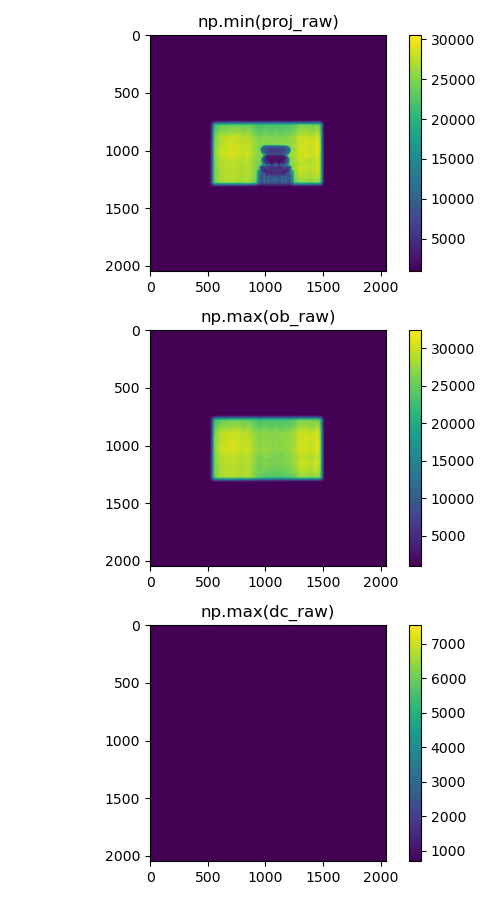

In [5]:
o_imars3dui.load_and_display_data()

# Crop

In [6]:
%matplotlib inline

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=0, description='left', max=2047), IntSlider(value=2047, continuous_updat…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 0.74s


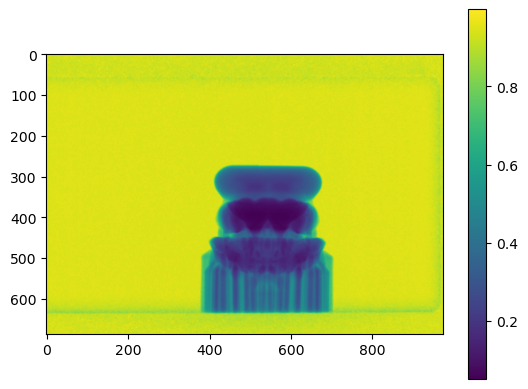

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### Select beam fluctuation region

In [13]:
o_imars3dui.apply_select_beam_fluctuation()

### perform beam fluctuation correction

In [14]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

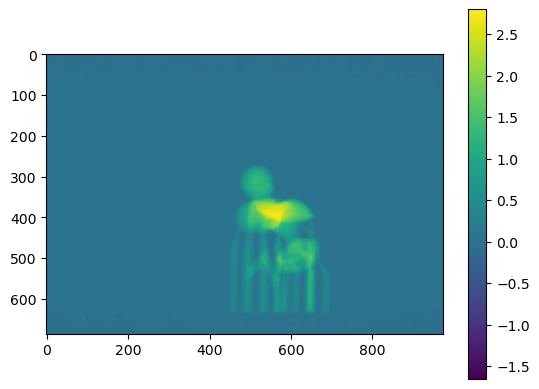

In [15]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [16]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [17]:
o_imars3dui.calculate_tilt()

### Slices to use to test tilt calculation

In [18]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=50, description='slice1', max=686), IntSlider(value=637, description='sl…

### testing tilt on selected algorithms (Zzz)

In [19]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.120 deg


Running direct minimization ... 

Applying tilt corr:   0%|          | 0/623 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 6
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('direct minimization',),…

### display data with tilt corrected 

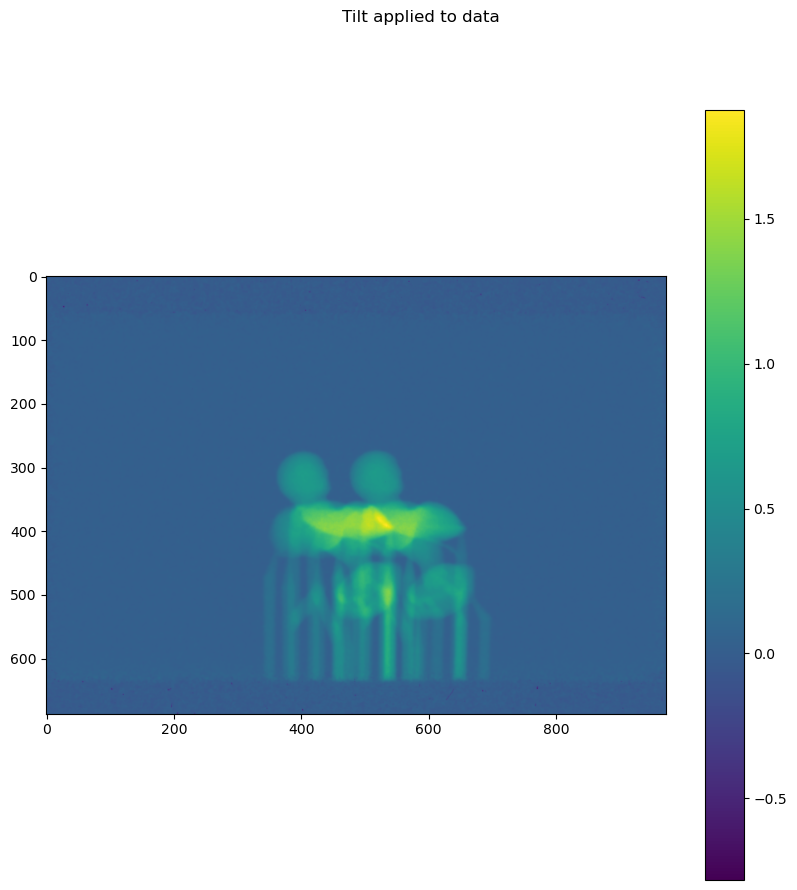

In [20]:
o_imars3dui.display_with_tilt()

# Filtering

* remove negative values

In [21]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Remove negative values')

In [22]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Display sinogram 

In [23]:
o_imars3dui.create_and_display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=687), Output()), _dom_classes=('widget-inter…

# Ring removal

### select 

In [24]:
o_imars3dui.ring_removal_options()

### apply 

In [25]:
o_imars3dui.apply_ring_removal_options()

No strikes removal using BM3D
No strikes removal using Vo
No strikes removal using Ketcham


### check 

In [26]:
o_imars3dui.test_ring_removal()

interactive(children=(IntSlider(value=0, description='index', max=687), Output()), _dom_classes=('widget-inter…

# Rotation center (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [27]:
o_imars3dui.rotation_center()

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 6
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Running rotation center ...


Finding rotation center:   0%|          | 0/625 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


rotation center found in 34.89s
 - value: (542.75,)


# Reconstruction 

INFO:imars3d.backend.reconstruction:Executing Filter: Reconstruction


Running reconstruction ...


INFO:imars3d.backend.reconstruction:FINISHED Executing Filter: Reconstruction: hann


 reconstruction done!
time= 0.66s


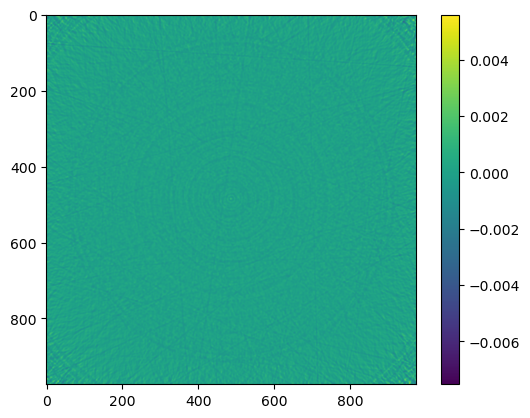

interactive(children=(IntSlider(value=0, description='index', max=687), Output()), _dom_classes=('widget-inter…

In [28]:
o_imars3dui.reconstruction_and_display()

# Export


In [29]:
o_imars3dui.export()

INFO:imars3d.backend.dataio.data:saving tiffs to "/HFIR/CG1D/IPTS-25777/shared/processed_data/test/iron_man_202406241629"


New folder will be created in /HFIR/CG1D/IPTS-25777/shared/processed_data/test and called iron_man_YYYYMMDDHHMM
